In [626]:
# HIRING TREND ANALYSIS:

# Insights:
# -> Software Engineer -> PSO -> Data -> Design seem to have the most placements in that order
# -> Fellows with less that a year's to 5+ years experience tend to get placed quickly
# -> Pathrise training seems to be doing well in preparing candidates for interviews
# -> As the program training lasts for 2 months, most placement improvement was noticeable in Data / PSO Fellows
# -> Could possibly tailor trainings for SWE / Design fellows who seem to have no change in trend who seem to be a major crowd
# -> Training can be improved for career coaching, getting past phone screens. Fellows seem to lack behind in these areas
# over the course of program
# -> Program should be equipped to retain fellows in early stages, hiring starts increasing at the end of 2 months
# many individuals tend to drop out before that


# Key metrics for getting hired:
#     -> Primary track
#     -> Length of Job Search
#     -> Professional Experience
#     -> Number of Applications
#     -> Gender

# Key metrics for getting hired early:
#     -> Biggest Challenge in Search
#     -> Professional Experience
#     -> Work Authorization Status
#     -> Gender


# # -> Pathrise status & Program Duration Days are excluded as they have direct dependence


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2


In [ ]:
data = pd.read_excel('C:/Users/omkar/OneDrive/Desktop/Self/Pathrise/Data_Pathrise.xlsx')
data.head(5)


In [179]:
data.columns = data.columns.str.replace(' ', '')
#dropping redundant columns
data = data.drop(['id', 'cohort_tag'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   program_duration_days        1928 non-null   float64
 3   placed                       2544 non-null   int64  
 4   employment_status            2315 non-null   object 
 5   highest_level_of_education   2486 non-null   object 
 6   length_of_job_search         2470 non-null   object 
 7   biggest_challenge_in_search  2520 non-null   object 
 8   professional_experience      2322 non-null   object 
 9   work_authorization_status    2260 non-null   object 
 10  number_of_interviews         2326 non-null   float64
 11  number_of_applications       2544 non-null   int64  
 12  gender                       2052 non-null   object 
 13  race              

In [180]:
#checking null counts
data.isna().sum().sort_values(ascending=False)

program_duration_days          616
gender                         492
work_authorization_status      284
employment_status              229
professional_experience        222
number_of_interviews           218
length_of_job_search            74
highest_level_of_education      58
biggest_challenge_in_search     24
race                            18
number_of_applications           0
placed                           0
primary_track                    0
pathrise_status                  0
dtype: int64

In [181]:
#finding unique categories
for col in data:
    print(col)
    print(data[col].unique())
    print("\t")


pathrise_status
['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']
	
primary_track
['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']
	
program_duration_days
[ nan   0.  89.  19.  13. 158.  12.  52.  11.  93. 193.  73. 286.   5.
   7.  83.  14.  16.  15.  76.  44.  26. 223.  65. 305. 187. 142. 101.
 266. 170. 332. 153. 156.  27. 143. 245. 243. 178. 233.  45. 192.  87.
 271. 129. 110.  36. 317.  10. 171.  62.  69. 177.  37.  38. 274. 284.
  59.  97. 144.  47. 234.  24. 296. 184. 282. 310. 163.  72. 240. 268.
 219.  53. 128. 137. 116. 272. 107.  32. 135.  48. 254.  40.  41. 123.
 206. 151. 195. 185.  18. 150. 250.  67.  20.   2. 139.  79. 241. 119.
 247. 181.  81.  95. 145. 360. 303.  68. 114. 430. 186. 208. 232. 111.
 138. 217.  31. 520. 202. 160.  88. 276. 194. 179.  75. 495.  86. 248.
 515. 478. 242. 136. 401. 244.  58. 436.  64. 354.  94. 420. 283. 285.
  60. 458. 207. 289. 209. 319. 246. 345. 325. 249. 298. 269. 226.  54.
 2

In [182]:
#fill null values with infinity suggesting candidates are still enrolled in an active program
data['program_duration_days'] = data['program_duration_days'].fillna(float('inf'))

In [183]:
data['gender'] = data['gender'].fillna('Decline to Self Identify')

In [184]:
##work in progress
data.work_authorization_status.value_counts()

Citizen           1104
F1 Visa/OPT        644
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [185]:
#imputing empty work authorization status with conditions
data.work_authorization_status = np.where(data.employment_status.isin(['Student']) & data.professional_experience.isin(['1-2 years']), data.work_authorization_status.fillna('F1 Visa/OPT'), data.work_authorization_status)
data.work_authorization_status = np.where(data.employment_status.isin(['Unemployed']) & data.professional_experience.isin(['5+ years']), data.work_authorization_status.fillna('Citizen'), data.work_authorization_status)
data.work_authorization_status = np.where(data.highest_level_of_education.isin(['Some College, No Degree']), data.work_authorization_status.fillna('Citizen'), data.work_authorization_status)

In [186]:
data['employment_status'] = data['employment_status'].fillna('Unemployed')

In [187]:
#replacing null values with interview frequency median
data['number_of_interviews'] = data['number_of_interviews'].fillna(data['number_of_interviews'].median())

In [188]:
data.length_of_job_search.value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [189]:
# Replacing nan with median
data['length_of_job_search'] = data['length_of_job_search'].fillna('Less than one month')

In [190]:
data.biggest_challenge_in_search.value_counts()

Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: biggest_challenge_in_search, dtype: int64

In [191]:
# Replacing nan with median
data['biggest_challenge_in_search'] = data['biggest_challenge_in_search'].fillna('Hearing back on my applications')

In [192]:
data['race'] = data['race'].fillna('Decline to Self Identify')

In [193]:
data.work_authorization_status.value_counts()

Citizen           1121
F1 Visa/OPT        671
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [194]:
data['work_authorization_status'] = data['work_authorization_status'].fillna('Citizen')

In [195]:
data.professional_experience.value_counts()

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: professional_experience, dtype: int64

In [196]:
data.highest_level_of_education.value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
Some High School                      15
High School Graduate                  15
GED or equivalent                     15
Name: highest_level_of_education, dtype: int64

In [197]:
data['highest_level_of_education'] = data['highest_level_of_education'].fillna("Bachelor's Degree")

In [198]:
data.isna().sum().sort_values(ascending=False)

professional_experience        222
race                             0
gender                           0
number_of_applications           0
number_of_interviews             0
work_authorization_status        0
biggest_challenge_in_search      0
length_of_job_search             0
highest_level_of_education       0
employment_status                0
placed                           0
program_duration_days            0
primary_track                    0
pathrise_status                  0
dtype: int64

In [199]:
#dropping null values
data_no_nan = data.dropna()

In [200]:
data_no_nan.head(5)

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,inf,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,inf,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [201]:
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2322 non-null   object 
 1   primary_track                2322 non-null   object 
 2   program_duration_days        2322 non-null   float64
 3   placed                       2322 non-null   int64  
 4   employment_status            2322 non-null   object 
 5   highest_level_of_education   2322 non-null   object 
 6   length_of_job_search         2322 non-null   object 
 7   biggest_challenge_in_search  2322 non-null   object 
 8   professional_experience      2322 non-null   object 
 9   work_authorization_status    2322 non-null   object 
 10  number_of_interviews         2322 non-null   float64
 11  number_of_applications       2322 non-null   int64  
 12  gender                       2322 non-null   object 
 13  race              

In [202]:
#changing data type
data_no_nan['pathrise_status'] = data_no_nan['pathrise_status'].astype('category')
data_no_nan['primary_track'] = data_no_nan['primary_track'].astype('category')
data_no_nan['placed'] = data_no_nan['placed'].astype('category')
data_no_nan['employment_status'] = data_no_nan['employment_status'].astype('category')
data_no_nan['highest_level_of_education'] = data_no_nan['highest_level_of_education'].astype('category')
data_no_nan['length_of_job_search'] = data_no_nan['length_of_job_search'].astype('category')
data_no_nan['biggest_challenge_in_search'] = data_no_nan['biggest_challenge_in_search'].astype('category')
data_no_nan['professional_experience'] = data_no_nan['professional_experience'].astype('category')
data_no_nan['work_authorization_status'] = data_no_nan['work_authorization_status'].astype('category')
data_no_nan['number_of_interviews'] = data_no_nan['number_of_interviews'].astype('int')
data_no_nan['gender'] = data_no_nan['gender'].astype('category')
data_no_nan['race'] = data_no_nan['race'].astype('category')


C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [203]:
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   pathrise_status              2322 non-null   category
 1   primary_track                2322 non-null   category
 2   program_duration_days        2322 non-null   float64 
 3   placed                       2322 non-null   category
 4   employment_status            2322 non-null   category
 5   highest_level_of_education   2322 non-null   category
 6   length_of_job_search         2322 non-null   category
 7   biggest_challenge_in_search  2322 non-null   category
 8   professional_experience      2322 non-null   category
 9   work_authorization_status    2322 non-null   category
 10  number_of_interviews         2322 non-null   int32   
 11  number_of_applications       2322 non-null   int64   
 12  gender                       2322 non-null   category
 13  rac

In [204]:
list(data_no_nan.groupby(['race']).number_of_interviews.unique())

[array([ 0,  1, 20,  6,  3,  4,  2,  8,  5,  7, 18]),
 array([ 5,  0, 10,  1,  2, 11,  7, 20,  3,  6,  4]),
 array([ 0, 10,  5,  1,  3,  2,  6,  4,  7, 15, 19, 20, 14, 16, 18]),
 array([ 4,  0,  2,  3,  5,  1, 17, 20, 10,  7,  6, 18]),
 array([3, 5, 1, 4, 0, 2, 7, 6]),
 array([1]),
 array([ 2,  6,  4,  5,  1,  0,  3, 10, 20, 12,  7,  8,  9, 14]),
 array([ 1,  0,  7,  2,  5,  3,  4,  6,  8, 20, 11, 15, 17, 13]),
 array([ 5,  2,  1,  0,  6,  4, 10,  3, 19, 11,  7, 16])]

In [205]:
# VISUALIZATIONS ----

C:\Users\omkar\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\omkar\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


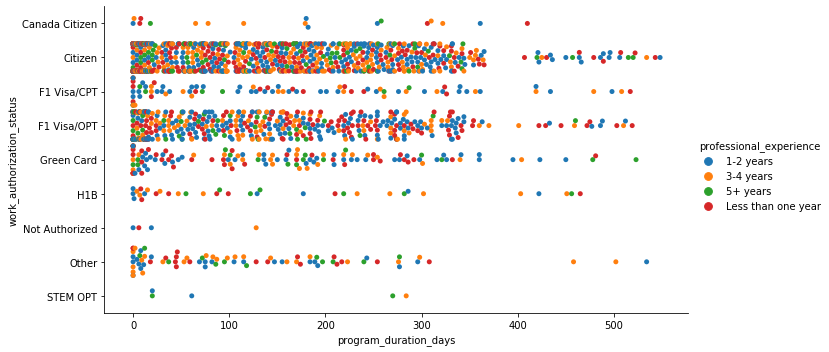

In [206]:
sns.catplot(x="program_duration_days", y="work_authorization_status", hue="professional_experience", kind="swarm", data=data_no_nan, height = 5, aspect = 2)

### Main population of fellows seem to be Citizen and F1-OPT students

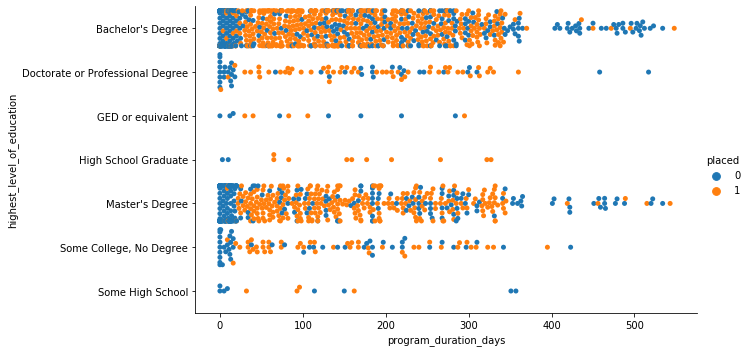

In [207]:
sns.catplot(x="program_duration_days", y="highest_level_of_education", hue="placed", kind="swarm", data=data_no_nan, height = 5, aspect = 2)

# Majority fellows -> Bachelor's / Master's Degree
# Seem to get placed starting 50 days -> throughout the year

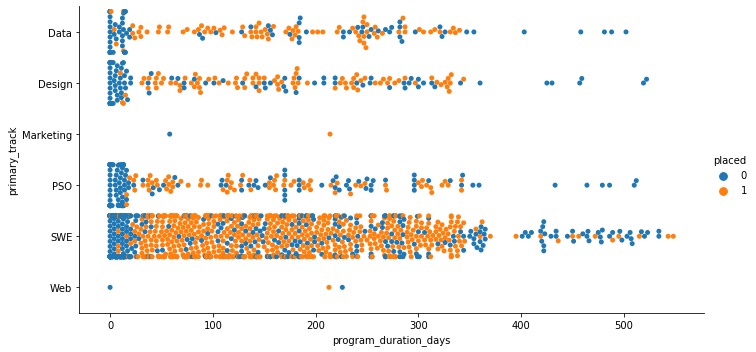

In [208]:
sns.catplot(x="program_duration_days", y="primary_track", hue="placed", kind="swarm", data=data_no_nan, height = 5, aspect = 2)

#Majority fellows come in for Sowtware Engineering training

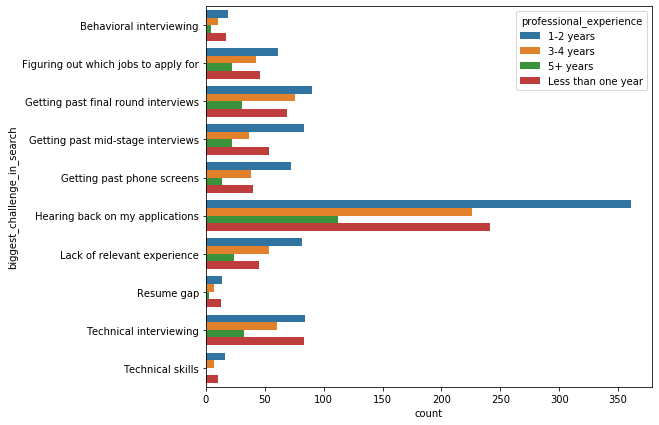

In [209]:
plt.figure(figsize=(8, 7))
sns.countplot(y="biggest_challenge_in_search", data=data_no_nan, hue="professional_experience")

# Majority fellows have problems with Hearing back from applications, Getting past final rounds, Technical Interviewing
# Fellows struggling mainly have professional experience -> less than one year, 1-2 years, 3-4 years

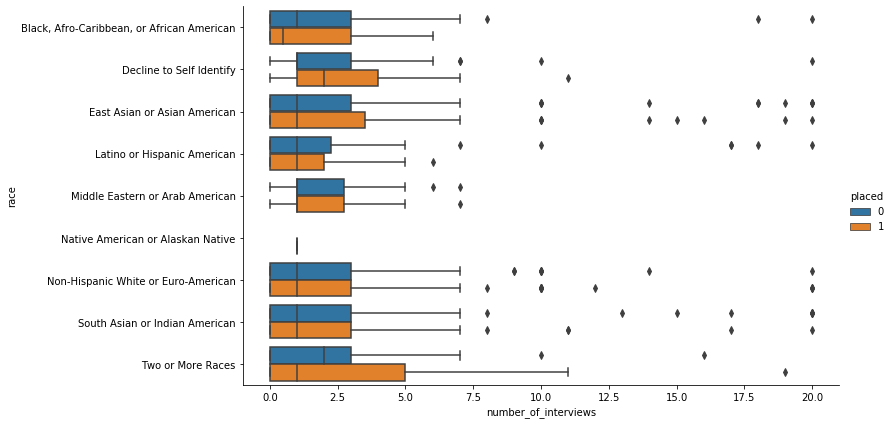

In [210]:
sns.catplot(x="number_of_interviews", y="race", hue="placed", kind="box", data=data_no_nan, height = 6, aspect = 2)

# Latinos / Hispanic Americans and Native Americans / Alaskan Natives seem to receive less interview calls

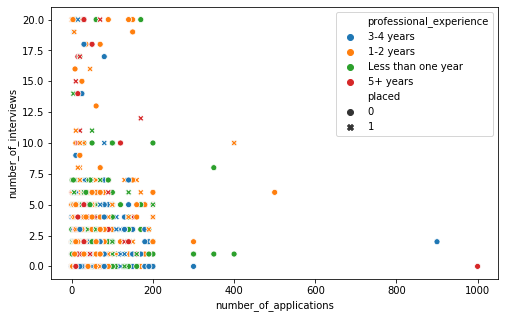

In [211]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_applications', y='number_of_interviews', data = data_no_nan, hue = 'professional_experience', style = 'placed')

# Observing relationships between no of applications and interviews

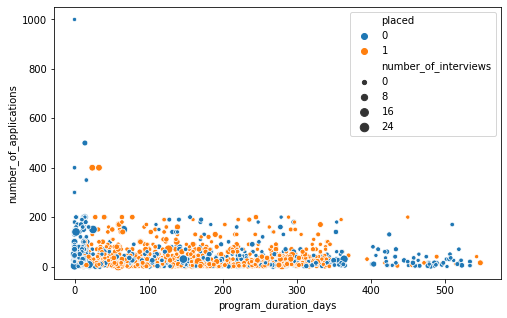

In [212]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='program_duration_days', y='number_of_applications', data = data_no_nan, hue = 'placed', size = 'number_of_interviews')

# Majority fellows push about 200 applications through the year

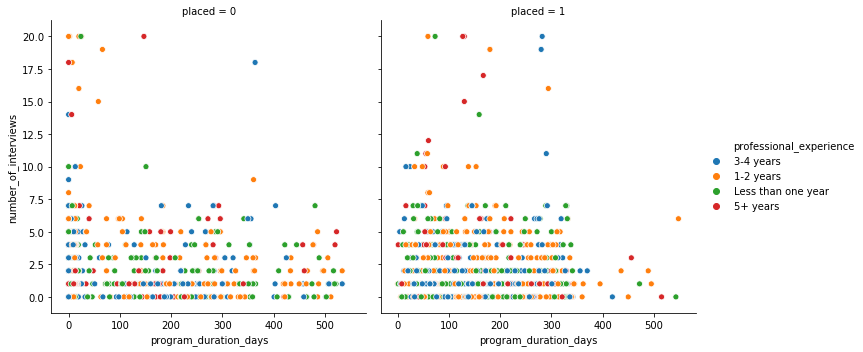

In [213]:
sns.relplot(
    data=data_no_nan, x="program_duration_days", y="number_of_interviews",
    col="placed", hue="professional_experience", 
    kind="scatter"
)

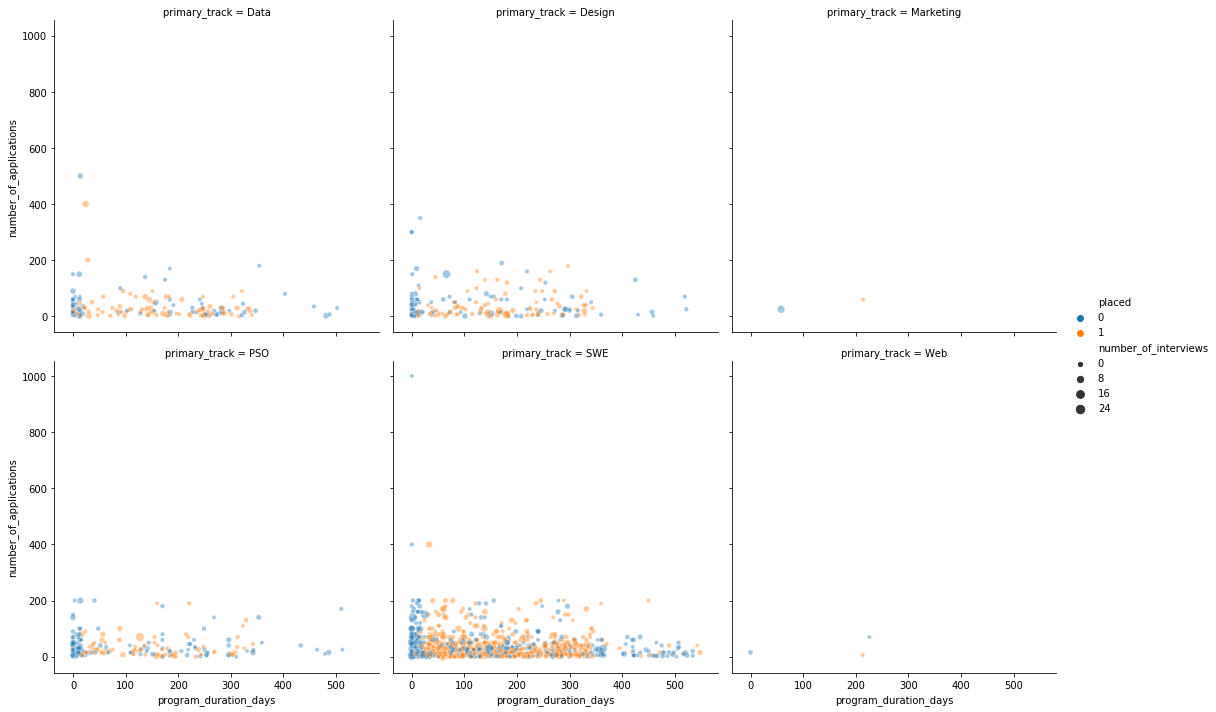

In [637]:
sns.relplot(
    data=data_no_nan, x="program_duration_days", y="number_of_applications",
    col="primary_track", size = 'number_of_interviews', hue = 'placed',
    kind="scatter", col_wrap = 3, alpha = 0.4
)

# Very few fellows for Marketing and Web

In [556]:
data_placed = data_no_nan[data_no_nan['placed']==1]
data_not_placed = data_no_nan[data_no_nan['placed']==0]
print(data_placed.shape)
print(data_not_placed.shape)


(901, 14)
(1421, 14)


In [217]:
data_placed.head(3)

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
4,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100,Male,East Asian or Asian American
23,Placed,PSO,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5,4,Male,Non-Hispanic White or Euro-American
30,Placed,SWE,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0,1,Male,East Asian or Asian American


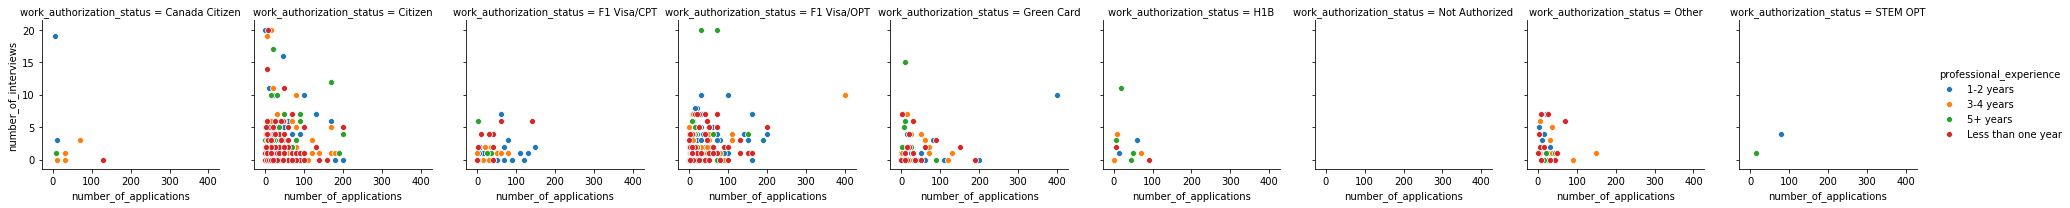

In [218]:
g = sns.FacetGrid(data_placed, col="work_authorization_status",  hue="professional_experience")
g.map(sns.scatterplot, "number_of_applications", "number_of_interviews")
g.add_legend()

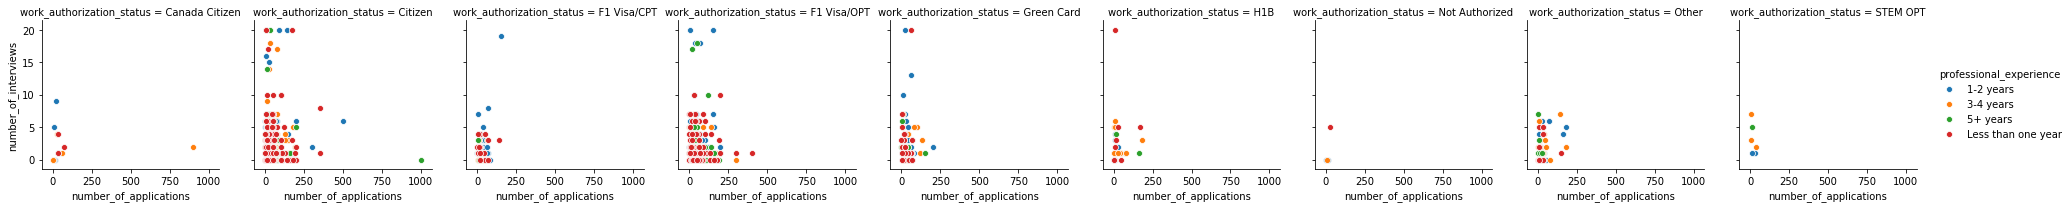

In [219]:
g = sns.FacetGrid(data_not_placed, col="work_authorization_status",  hue="professional_experience")
g.map(sns.scatterplot, "number_of_applications", "number_of_interviews")
g.add_legend()

#Majority fellows seem to have experience of under one year, with Citizenship or F1 Visa

In [220]:
data_placed['professional_experience'].unique()

[1-2 years, 5+ years, 3-4 years, Less than one year]
Categories (4, object): [1-2 years, 5+ years, 3-4 years, Less than one year]

In [221]:
data_placed['professional_experience'].cat.reorder_categories(['Less than one year', '1-2 years', '3-4 years', '5+ years'], inplace=True)
data_not_placed['professional_experience'].cat.reorder_categories(['Less than one year', '1-2 years', '3-4 years', '5+ years'], inplace=True)
data_no_nan['professional_experience'].cat.reorder_categories(['Less than one year', '1-2 years', '3-4 years', '5+ years'], inplace=True)


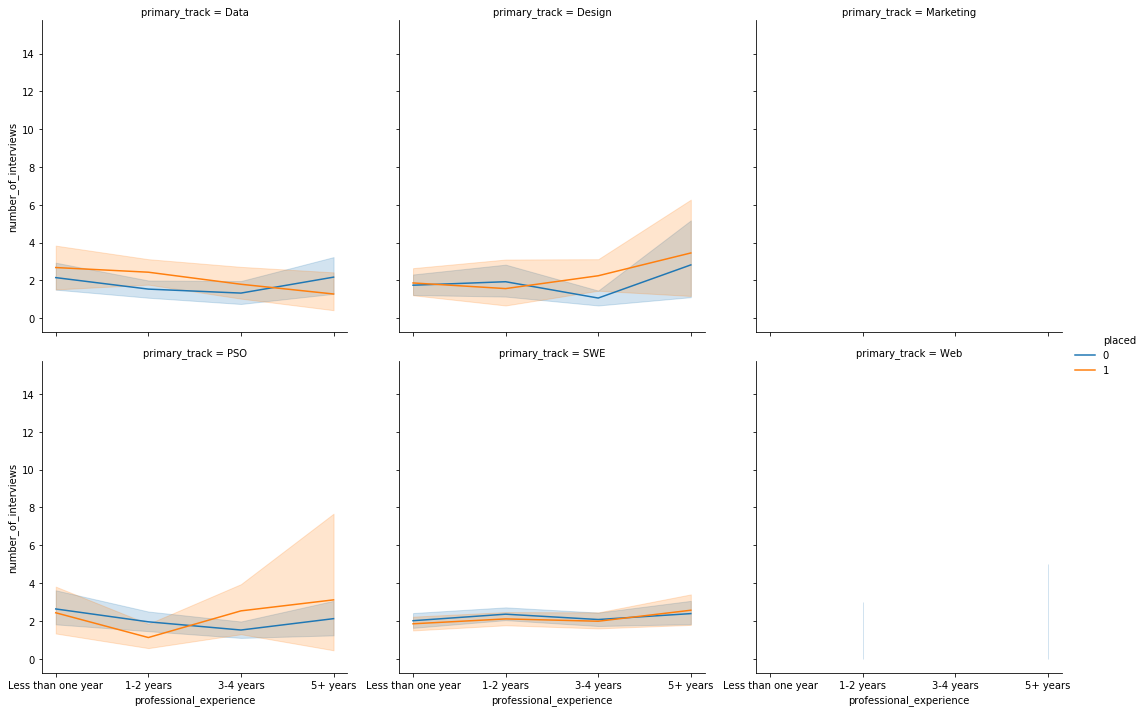

In [222]:
sns.relplot(
    data=data_no_nan, x="professional_experience", y="number_of_interviews",
    col="primary_track", kind="line", hue = 'placed', col_wrap = 3
)

# Data -> Fellows with less than a year to 2 years tend to find a job comparatively easily
# SWE & PSO -> Seem to get placed easily with an experience of 3 years or more

In [223]:
data_placed['length_of_job_search'].unique()

[1-2 months, 6 months to a year, Less than one month, 3-5 months, Over a year]
Categories (5, object): [1-2 months, 6 months to a year, Less than one month, 3-5 months, Over a year]

In [224]:
data_placed['length_of_job_search'].cat.reorder_categories(['Less than one month', '1-2 months', '3-5 months', '6 months to a year', 'Over a year'], inplace=True)
data_not_placed['length_of_job_search'].cat.reorder_categories(['Less than one month', '1-2 months', '3-5 months', '6 months to a year', 'Over a year'], inplace=True)
data_no_nan['length_of_job_search'].cat.reorder_categories(['Less than one month', '1-2 months', '3-5 months', '6 months to a year', 'Over a year'], inplace=True)


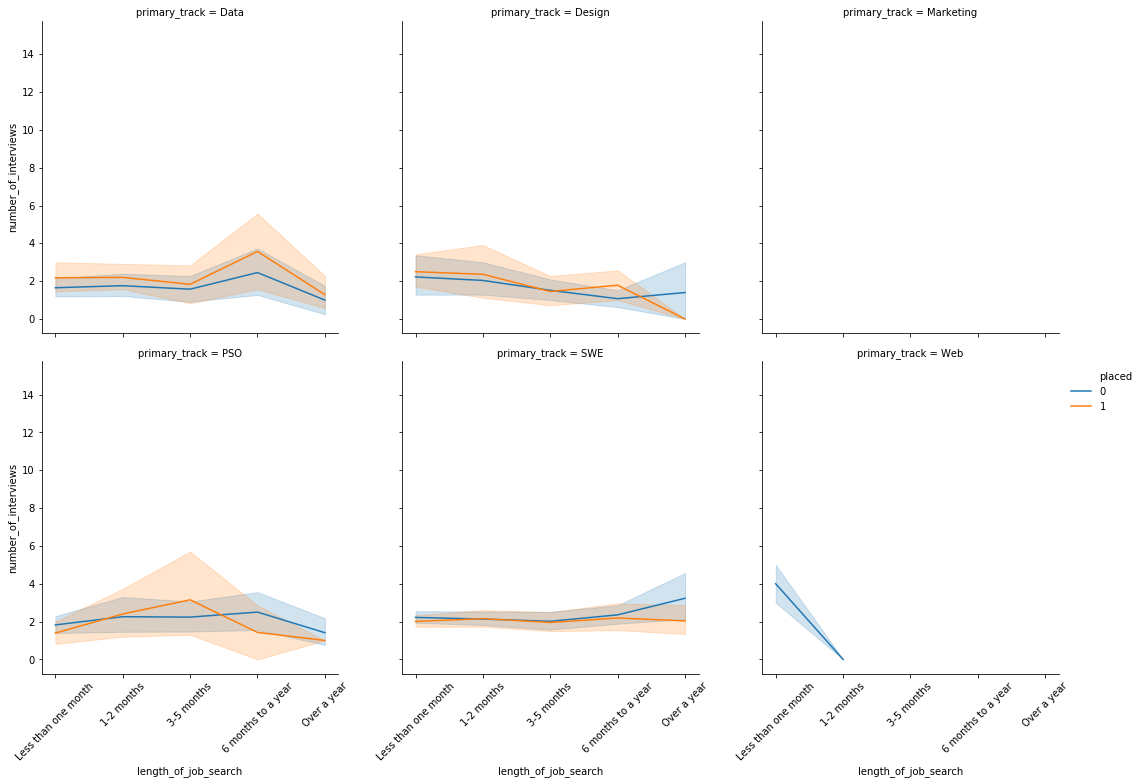

In [638]:
ax = sns.relplot(
    data=data_no_nan, x="length_of_job_search", y="number_of_interviews",
    col="primary_track", kind="line", hue = 'placed', col_wrap = 3
)

ax.set_xticklabels(rotation=45)

# Consdering Pathrise trains fellows for 2 months (8 weeks) -

# Data & PSO fellows -> seem to get a bump in interview calls after training with greater chances of getting placed between
# a time span of 3 months - 1 year

# Design fellows & SWE show no increase in interviews throught the year

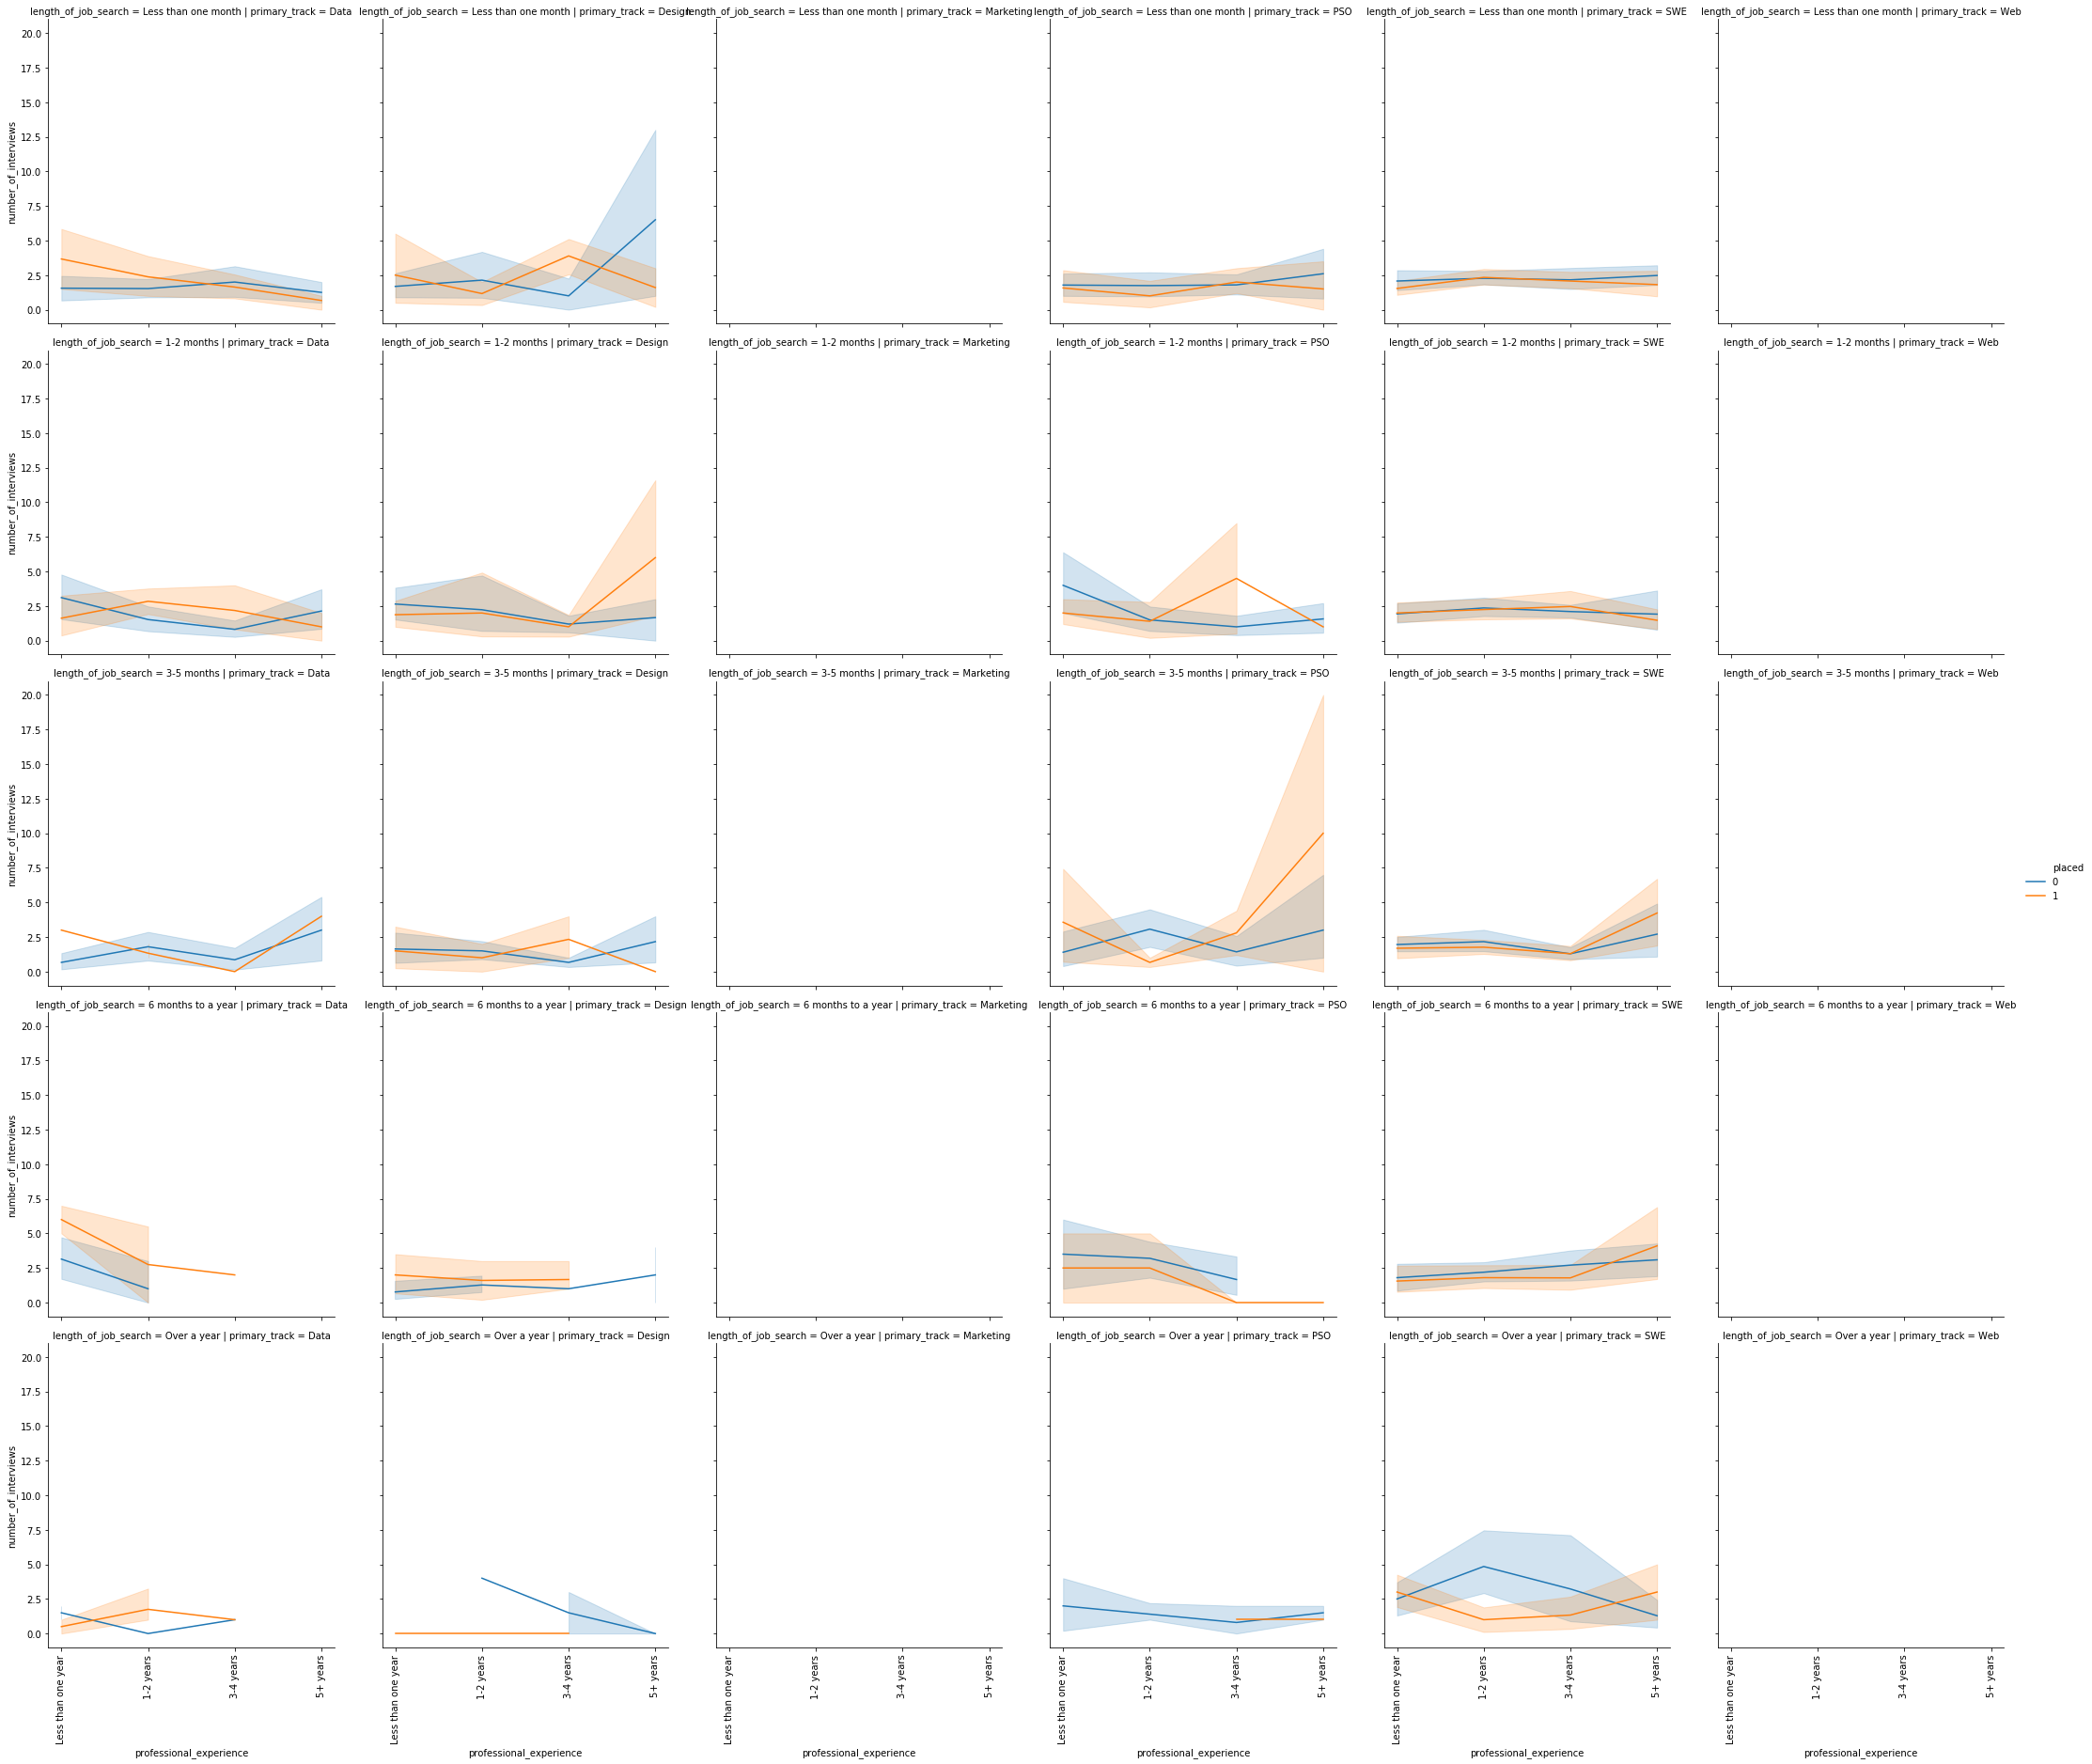

In [228]:
ax = sns.relplot(
    data=data_no_nan, x="professional_experience", y="number_of_interviews",
    col="primary_track", row = 'length_of_job_search', kind="line", hue = 'placed'
)

ax.set_xticklabels(rotation=90)

# Data Fellows with 1-4 years of experience can expect successful interviews through 2nd month of training

# Highly qualified Design fellows can expect successful interviews in the 1st 2 months

# Highly qualified PSO fellows can expect successful interviews within 3-5 months

# SWE fellows can expect successful interviews steadily through the year 


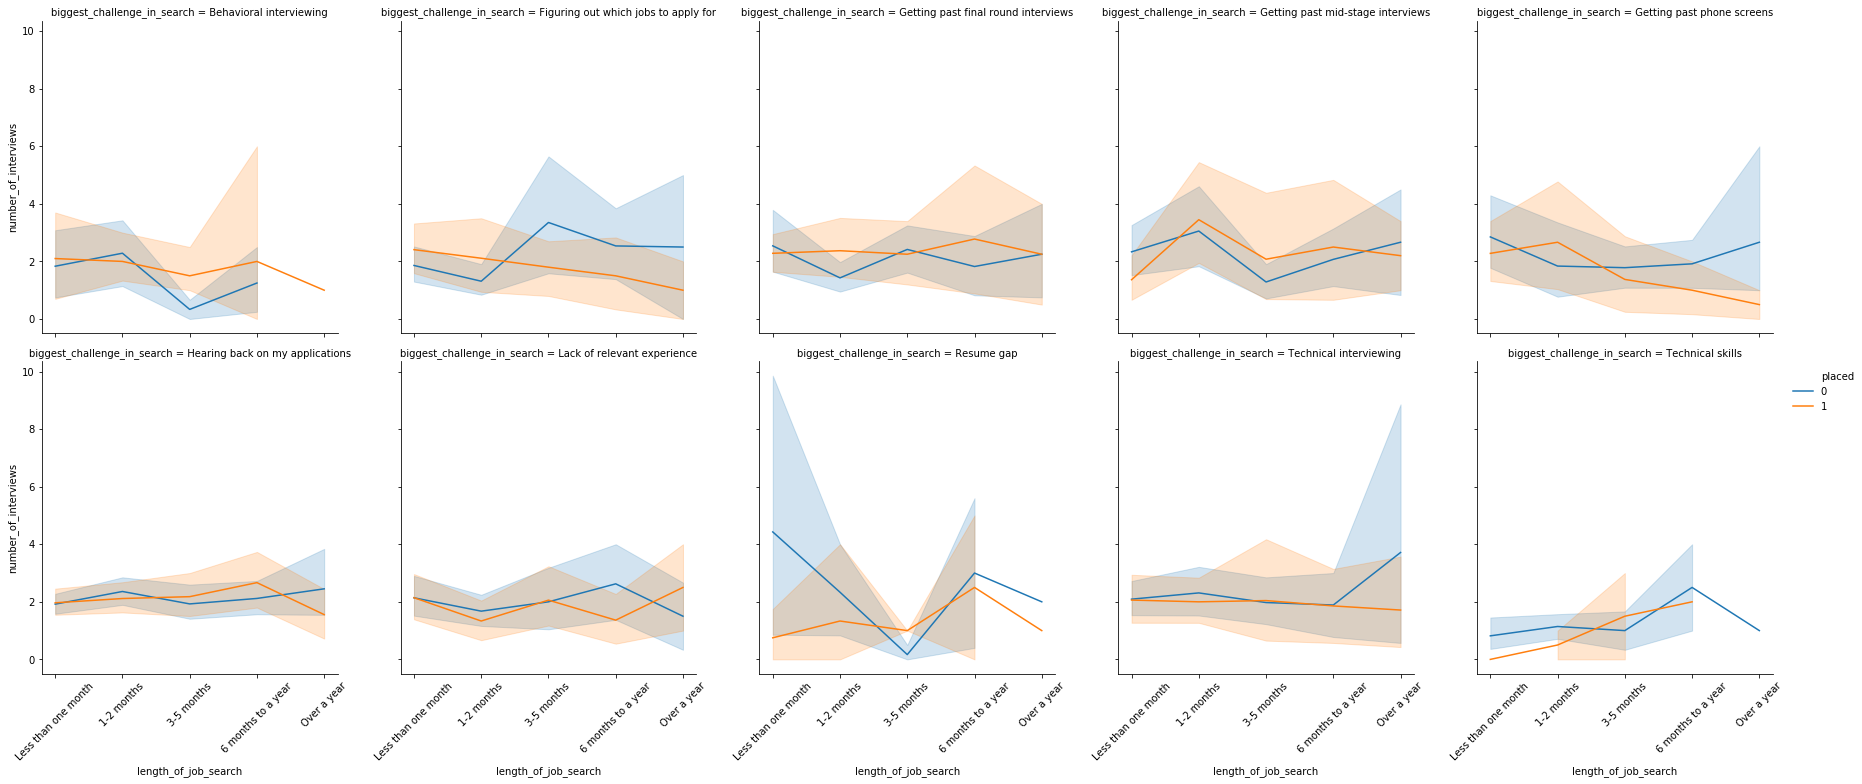

In [229]:
ax = sns.relplot(
    data=data_no_nan, x="length_of_job_search", y="number_of_interviews",
    col="biggest_challenge_in_search", kind="line", hue = 'placed', col_wrap = 5
)

ax.set_xticklabels(rotation=45)


# Pathrise training programs seem to do well with interview prep, but not distinct improvements


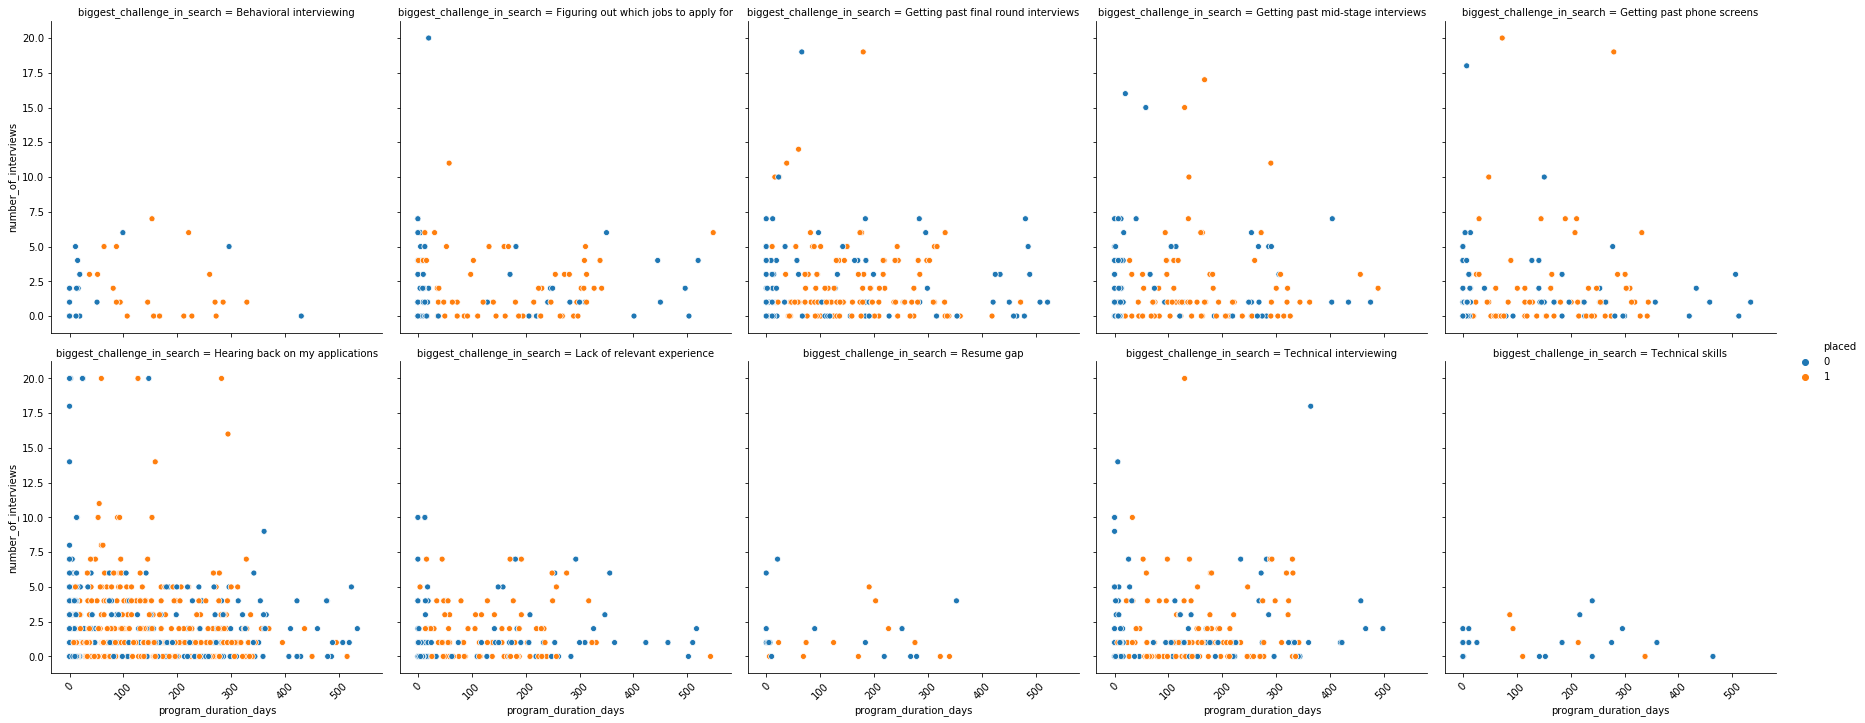

In [642]:
ax = sns.relplot(
    data=data_no_nan, x="program_duration_days", y="number_of_interviews",
    col="biggest_challenge_in_search", kind="scatter", hue = 'placed', col_wrap = 5
)

ax.set_xticklabels(rotation=45)




[Text(0, 0, 'Less than one month'),
 Text(0, 0, '1-2 months'),
 Text(0, 0, '3-5 months'),
 Text(0, 0, '6 months to a year'),
 Text(0, 0, 'Over a year')]

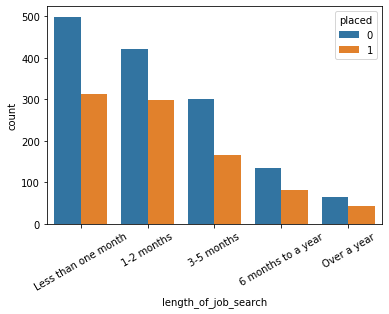

In [231]:
ax = sns.countplot(x = "length_of_job_search", hue = "placed", data = data_no_nan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)



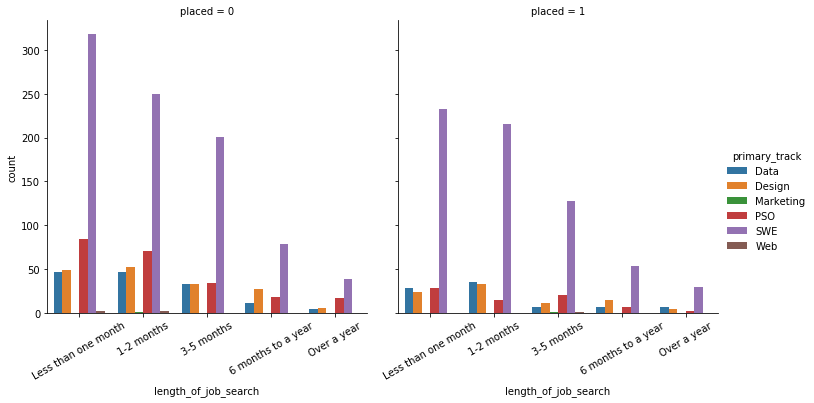

In [232]:
ax = sns.catplot(x = "length_of_job_search", hue = "primary_track", col = "placed", data = data_no_nan, kind = "count")
ax.set_xticklabels(rotation=30)


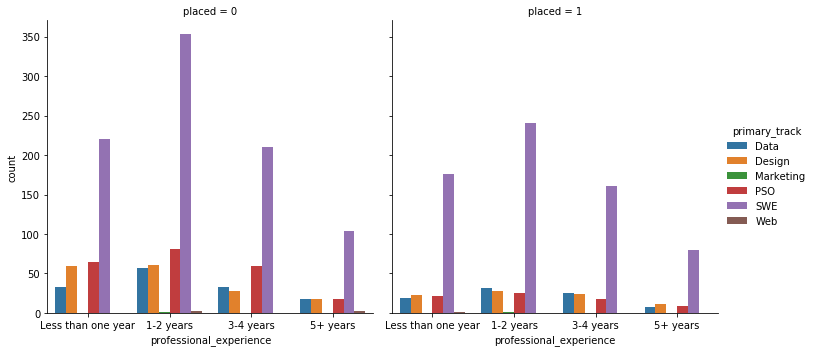

In [233]:
ax = sns.catplot(x = "professional_experience", hue = "primary_track", col = "placed", data = data_no_nan, kind = "count")


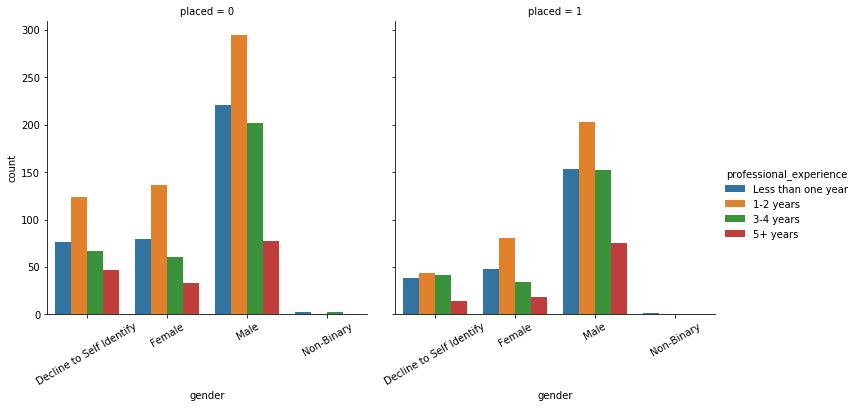

In [234]:
ax = sns.catplot(x = "gender", hue = "professional_experience", col = "placed", data = data_no_nan, kind = "count")
ax.set_xticklabels(rotation=30)


In [235]:
data_no_nan.head(3)

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,inf,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,inf,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0,0,Male,East Asian or Asian American


In [643]:
################ MODEL 1 #######################################

#Encoding categorical variables
data_dummies = pd.get_dummies(data_no_nan, columns = ['pathrise_status', 'primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race'])
data_dummies.head(3)

,program_duration_days,placed,number_of_interviews,number_of_applications,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,length_of_job_search_Less than one month,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,...,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,professional_experience_Less than one year,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,inf,0,2,900,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,inf,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [644]:
infinity = data_dummies['program_duration_days'][0]
data_dummies.program_duration_days = data_dummies.program_duration_days.replace(infinity, 999)
data_dummies.head(5)

,program_duration_days,placed,number_of_interviews,number_of_applications,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,length_of_job_search_Less than one month,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,...,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,professional_experience_Less than one year,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,999.0,0,2,900,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,999.0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.0,0,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,89.0,1,10,100,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [645]:
#Scaling

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_dummies), columns=data_dummies.columns)
data_scaled.head(5)

,program_duration_days,placed,number_of_interviews,number_of_applications,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,length_of_job_search_Less than one month,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,...,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,professional_experience_Less than one year,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,1.000000,0.0,0.10,0.900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.0,0.30,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.00,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.25,0.025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.089089,1.0,0.50,0.100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [646]:
pd.set_option('display.max_columns',71)


In [647]:
data_scaled.groupby('placed').mean()

,program_duration_days,number_of_interviews,number_of_applications,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,length_of_job_search_Less than one month,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Over a year,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,professional_experience_Less than one year,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
placed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.458746,0.104715,0.036999,0.334975,0.020408,0.111189,0.020408,0.035186,0.0,0.249824,0.051372,0.176636,0.098522,0.116819,0.000704,0.156932,0.624208,0.002815,0.072484,0.170303,0.100633,0.305419,0.351161,0.548909,0.047854,0.006334,0.003519,0.330049,0.056298,0.007037,0.351161,0.296270,0.211823,0.095004,0.045742,0.020408,0.080225,0.106263,0.083744,0.067558,0.411682,0.086559,0.017593,0.106967,0.019001,0.266010,0.39057,0.232935,0.110486,0.009852,0.516538,0.052076,0.273751,0.073188,0.022519,0.002815,0.045039,0.004222,0.220971,0.216749,0.559465,0.002815,0.059817,0.040113,0.349754,0.064743,0.018297,0.00000,0.228712,0.199859,0.038705
1.0,0.159875,0.103774,0.035355,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.092120,0.095450,0.001110,0.079911,0.730300,0.001110,0.058824,0.167592,0.108768,0.299667,0.365150,0.567148,0.056604,0.005549,0.011099,0.301887,0.053274,0.004440,0.347392,0.331853,0.184240,0.089900,0.046615,0.023307,0.064373,0.127636,0.085461,0.075472,0.394007,0.091010,0.013319,0.118757,0.006659,0.266371,0.36293,0.251942,0.118757,0.008879,0.554939,0.047725,0.251942,0.074362,0.013319,0.000000,0.046615,0.002220,0.152053,0.199778,0.647059,0.001110,0.031077,0.021088,0.354051,0.055494,0.033296,0.00333,0.230855,0.243063,0.027747


In [648]:
X_train, X_val, y_train, y_val = train_test_split(data_scaled, y, test_size=0.4, random_state=27)


In [649]:
####################### PLACEMENTS ##################################


####################### MODEL 1 ##################################


model_1 = LDA()
model_1.fit(X_train, y_train)
preds = model_1.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

# Great accuracy with Latent Dirichlet Allocation

Accuracy: 0.9268030139935415
F1 Score: 0.9011627906976745


In [403]:
####################### MODEL 2 ##################################

X_data = data_no_nan.drop(['placed'], axis = 1)
y_data = data_no_nan['placed']

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_data, y_data, test_size=0.33, random_state=5)

In [404]:
X_train_m2.program_duration_days = X_train_m2.program_duration_days.replace(infinity, 999)
X_test_m2.program_duration_days = X_test_m2.program_duration_days.replace(infinity, 999)


C:\Users\omkar\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [405]:
X_train_m2['pathrise_status'] = X_train_m2['pathrise_status'].astype(str)
X_train_m2['primary_track'] = X_train_m2['primary_track'].astype(str)
X_train_m2['employment_status'] = X_train_m2['employment_status'].astype(str)
X_train_m2['highest_level_of_education'] = X_train_m2['highest_level_of_education'].astype(str)
X_train_m2['length_of_job_search'] = X_train_m2['length_of_job_search'].astype(str)
X_train_m2['biggest_challenge_in_search'] = X_train_m2['biggest_challenge_in_search'].astype(str)
X_train_m2['professional_experience'] = X_train_m2['professional_experience'].astype(str)
X_train_m2['work_authorization_status'] = X_train_m2['work_authorization_status'].astype(str)
X_train_m2['gender'] = X_train_m2['gender'].astype(str)
X_train_m2['race'] = X_train_m2['race'].astype(str)


C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [406]:
X_train_enc = X_train_m2[['pathrise_status', 'primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']]
X_test_enc = X_test_m2[['pathrise_status', 'primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']]

In [407]:
X_test_m2['pathrise_status'] = X_test_m2['pathrise_status'].astype(str)
X_test_m2['primary_track'] = X_test_m2['primary_track'].astype(str)
X_test_m2['employment_status'] = X_test_m2['employment_status'].astype(str)
X_test_m2['highest_level_of_education'] = X_test_m2['highest_level_of_education'].astype(str)
X_test_m2['length_of_job_search'] = X_test_m2['length_of_job_search'].astype(str)
X_test_m2['biggest_challenge_in_search'] = X_test_m2['biggest_challenge_in_search'].astype(str)
X_test_m2['professional_experience'] = X_test_m2['professional_experience'].astype(str)
X_test_m2['work_authorization_status'] = X_test_m2['work_authorization_status'].astype(str)
X_test_m2['gender'] = X_test_m2['gender'].astype(str)
X_test_m2['race'] = X_test_m2['race'].astype(str)


C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [296]:
X_train_m2.head(1)

,pathrise_status,primary_track,program_duration_days,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
1557,Closed Lost,Data,0.0,Contractor,Master's Degree,Less than one month,Hearing back on my applications,5+ years,Citizen,0,35,Decline to Self Identify,Non-Hispanic White or Euro-American


In [294]:
#Encoding categorical variables
oe = OrdinalEncoder()
oe.fit(X_train_enc)
X_train_enc = oe.transform(X_train_enc)
X_test_enc = oe.transform(X_test_enc)


In [366]:
X_train_df_enc = pd.DataFrame(X_train_enc)
X_test_df_enc = pd.DataFrame(X_test_enc)

In [367]:
#X_train_df_enc['program_duration_days'] = X_train_m2['program_duration_days'].reset_index(drop=True)
#X_test_df_enc['program_duration_days'] = X_test_m2['program_duration_days'].reset_index(drop=True)

X_train_df_enc['number_of_interviews'] = X_train_m2['number_of_interviews'].reset_index(drop=True)
X_test_df_enc['number_of_interviews'] = X_test_m2['number_of_interviews'].reset_index(drop=True)

X_train_df_enc['number_of_applications'] = X_train_m2['number_of_applications'].reset_index(drop=True)
X_test_df_enc['number_of_applications'] = X_test_m2['number_of_applications'].reset_index(drop=True)

In [369]:
X_train_df_enc = X_train_df_enc.drop(0, axis = 1)
X_test_df_enc = X_test_df_enc.drop(0, axis = 1)

In [371]:
#Feature selection with chi2 test
fs_chi = SelectKBest(score_func=chi2, k=10)
fs_chi.fit(X_train_df_enc, y_train_m2)
X_train_fs_chi = fs_chi.transform(X_train_df_enc)
X_test_fs_chi = fs_chi.transform(X_test_df_enc)

Feature 0: 3.293580
Feature 1: 1.410554
Feature 2: 1.118313
Feature 3: 0.031633
Feature 4: 0.121420
Feature 5: 0.066290
Feature 6: 1.710072
Feature 7: 8.876258
Feature 8: 8.239530
Feature 9: 5.884516
Feature 10: 17.870770


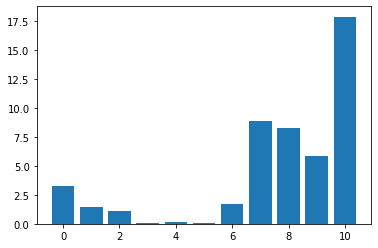

In [372]:
# what are scores for the features
for i in range(len(fs_chi.scores_)):
    print('Feature %d: %f' % (i, fs_chi.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
plt.show()

In [384]:
#Feature selection with mutual info test

fs_mut = SelectKBest(score_func=mutual_info_classif, k=5)
fs_mut.fit(X_train_df_enc, y_train_m2)
X_train_fs_mut = fs_mut.transform(X_train_df_enc)
X_test_fs_mut = fs_mut.transform(X_test_df_enc)


Feature 0: 0.005511
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.005732
Feature 4: 0.000000
Feature 5: 0.010366
Feature 6: 0.001164
Feature 7: 0.000000
Feature 8: 0.028123
Feature 9: 0.002890
Feature 10: 0.000000


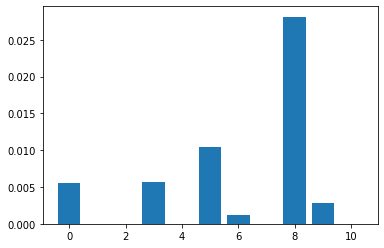

In [390]:
# what are scores for the features
for i in range(len(fs_mut.scores_)):
    print('Feature %d: %f' % (i, fs_mut.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_mut.scores_))], fs_mut.scores_)
plt.show()

In [686]:
#### Key informative features for placement:
# -> Primary track
# -> Length of Job Search
# -> Professional Experience
# -> Gender
# -> Number of Applications

# -> Pathrise status & Program Duration Days are excluded as they have direct dependence

In [375]:
###### MODEL 2

# fit the model
model_2 = LogisticRegression(solver='lbfgs')
model_2.fit(X_train_fs_chi, y_train_m2)
# evaluate the model
yhat = model_2.predict(X_test_fs_chi)
# evaluate predictions
accuracy = accuracy_score(y_test_m2, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 62.19


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [386]:
###### MODEL 3

# fit the model
model_3 = LogisticRegression(solver='lbfgs')
model_3.fit(X_train_fs_mut, y_train_m2)
# evaluate the model
yhat = model_3.predict(X_test_fs_mut)
# evaluate predictions
accuracy = accuracy_score(y_test_m2, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 61.80


In [377]:
###### MODEL 4

# fit the model
model_4 = LogisticRegression(solver='lbfgs')
model_4.fit(X_train_df_enc, y_train_m2)
# evaluate the model
yhat = model_4.predict(X_test_df_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_m2, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 61.93


In [557]:
data_placed['primary_track'] = data_placed['primary_track'].astype(str)
data_placed['employment_status'] = data_placed['employment_status'].astype(str)
data_placed['highest_level_of_education'] = data_placed['highest_level_of_education'].astype(str)
data_placed['length_of_job_search'] = data_placed['length_of_job_search'].astype(str)
data_placed['biggest_challenge_in_search'] = data_placed['biggest_challenge_in_search'].astype(str)
data_placed['professional_experience'] = data_placed['professional_experience'].astype(str)
data_placed['work_authorization_status'] = data_placed['work_authorization_status'].astype(str)
data_placed['gender'] = data_placed['gender'].astype(str)
data_placed['race'] = data_placed['race'].astype(str)


C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omkar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [559]:
data_placed.drop(data_placed[data_placed['primary_track'] == 'Marketing'].index, inplace = True) 
data_placed.drop(data_placed[data_placed['primary_track'] == 'Web'].index, inplace = True) 
data_placed.head(1)

C:\Users\omkar\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
4,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100,Male,East Asian or Asian American


In [570]:
####################### TIME OF PLACEMENT ##################################

X_time_data = data_placed.drop(['placed', 'program_duration_days', 'length_of_job_search', 'pathrise_status'], axis = 1)
y_time_data = data_placed['length_of_job_search']

X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time_data, y_time_data, test_size=0.33, random_state=5)

In [571]:
print(X_train_time['primary_track'].value_counts())
print(X_test_time['primary_track'].unique())

SWE       438
Data       60
Design     55
PSO        49
Name: primary_track, dtype: int64
['SWE' 'Design' 'PSO' 'Data']


In [572]:
X_train_time_enc = X_train_time[['primary_track', 'employment_status', 'highest_level_of_education', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']]
X_test_time_enc = X_test_time[['primary_track', 'employment_status', 'highest_level_of_education', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']]

In [573]:
#Encoding categorical variables
oe_time1 = OrdinalEncoder()
oe_time1.fit(X_train_time_enc)
X_train_time_enc = oe_time1.transform(X_train_time_enc)
X_test_time_enc = oe_time1.transform(X_test_time_enc)


In [655]:
#Encoding target variable
le = LabelEncoder()
le.fit(y_train_time)
y_train_time_enc = le.transform(y_train_time)
y_test_time_enc = le.transform(y_test_time)


In [575]:
X_train_time_enc = pd.DataFrame(X_train_time_enc)
X_test_time_enc = pd.DataFrame(X_test_time_enc)

In [576]:
X_train_time_enc['number_of_interviews'] = X_train_time['number_of_interviews'].reset_index(drop=True)
X_test_time_enc['number_of_interviews'] = X_test_time['number_of_interviews'].reset_index(drop=True)

X_train_time_enc['number_of_applications'] = X_train_time['number_of_applications'].reset_index(drop=True)
X_test_time_enc['number_of_applications'] = X_test_time['number_of_applications'].reset_index(drop=True)

In [580]:
#Feature selection with chi2 test
fs_chi_time = SelectKBest(score_func=chi2, k=8)
fs_chi_time.fit(X_train_time_enc, y_train_time_enc)
X_train_time_chi = fs_chi_time.transform(X_train_time_enc)
X_test_time_chi = fs_chi_time.transform(X_test_time_enc)

In [578]:
X_train_time_enc.head(1)

,0,1,2,3,4,5,6,7,number_of_interviews,number_of_applications
0,3.0,3.0,0.0,8.0,1.0,3.0,0.0,6.0,2,60


Feature 0: 6.300870
Feature 1: 1.125892
Feature 2: 25.838722
Feature 3: 3.310499
Feature 4: 1.938660
Feature 5: 3.104734
Feature 6: 3.154226
Feature 7: 3.845225
Feature 8: 22.333872
Feature 9: 252.871648


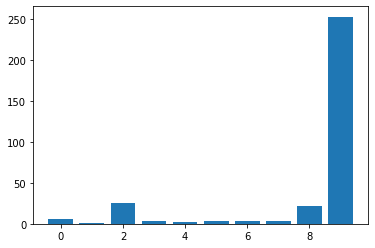

In [579]:
# what are scores for the features
for i in range(len(fs_chi_time.scores_)):
    print('Feature %d: %f' % (i, fs_chi_time.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_chi_time.scores_))], fs_chi_time.scores_)
plt.show()

In [584]:
#Feature selection with mutual info test

fs_mut_time = SelectKBest(score_func=mutual_info_classif, k=8)
fs_mut_time.fit(X_train_time_enc, y_train_time_enc)
X_train_time_mut = fs_mut_time.transform(X_train_time_enc)
X_test_time_mut = fs_mut_time.transform(X_test_time_enc)


In [582]:
X_train_time_enc.head(1)

,0,1,2,3,4,5,6,7,number_of_interviews,number_of_applications
0,3.0,3.0,0.0,8.0,1.0,3.0,0.0,6.0,2,60


Feature 0: 0.001704
Feature 1: 0.012604
Feature 2: 0.015263
Feature 3: 0.028990
Feature 4: 0.056300
Feature 5: 0.036890
Feature 6: 0.018043
Feature 7: 0.006566
Feature 8: 0.016276
Feature 9: 0.012300


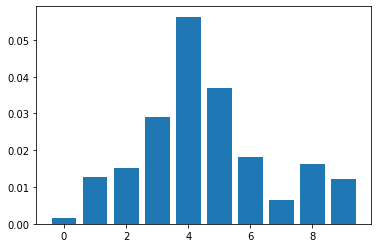

In [583]:
# what are scores for the features
for i in range(len(fs_mut_time.scores_)):
    print('Feature %d: %f' % (i, fs_mut_time.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_mut_time.scores_))], fs_mut_time.scores_)
plt.show()

In [687]:
#Key informative variables for getting job soon:
# -> Biggest Challenge in Search
# -> Professional Experience
# -> Work Authorization Status
# -> Gender


,primary_track,employment_status,highest_level_of_education,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2375,SWE,Student,Bachelor's Degree,Technical interviewing,3-4 years,F1 Visa/OPT,2,60,Decline to Self Identify,Non-Hispanic White or Euro-American


In [603]:
###### MODEL 1 - Time before getting placed

# fit the model
model_time_1 = LogisticRegression(solver='lbfgs', max_iter = 750)
model_time_1.fit(X_train_time_chi, y_train_time_enc)
# evaluate the model
yhat_time = model_time_1.predict(X_test_time_chi)
# evaluate predictions
accuracy = accuracy_score(y_test_time_enc, yhat_time)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 29.63


In [606]:
###### MODEL 2

# fit the model
model_time_2 = LogisticRegression(solver='lbfgs', max_iter = 800)
model_time_2.fit(X_train_time_mut, y_train_time_enc)
# evaluate the model
yhat_time_mut = model_time_2.predict(X_test_time_mut)
# evaluate predictions
accuracy = accuracy_score(y_test_time_enc, yhat_time_mut)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 30.64


In [609]:
###### MODEL 3

# fit the model
model_time_3 = LogisticRegression(solver='lbfgs', max_iter = 900)
model_time_3.fit(X_train_time_enc, y_train_time_enc)
# evaluate the model
yhat_time_enc = model_time_3.predict(X_test_time_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_time_enc, yhat_time_enc)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 30.98


In [623]:
###### MODEL 4

model_time_4 = LDA()
model_time_4.fit(X_train_time_enc, y_train_time_enc)
preds_time = model_time_4.predict(X_test_time_enc)
acc = accuracy_score(y_test_time_enc, preds_time)
f1 = f1_score(y_test_time_enc, preds_time, average = 'weighted')

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.3063973063973064
F1 Score: 0.23780947949508163


In [636]:
##### MODEL 5
# Create Decision Tree classifer object
for i in range(1,10):
    clf_time = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    # Train Decision Tree Classifer
    clf_time = clf_time.fit(X_train_time_enc,y_train_time_enc)

    #Predict the response for test dataset
    y_pred = clf_time.predict(X_test_time_enc)
    
    print("Accuracy:",metrics.accuracy_score(y_test_time_enc, y_pred))


Accuracy: 0.31986531986531985
Accuracy: 0.31986531986531985
Accuracy: 0.30976430976430974
Accuracy: 0.3063973063973064
Accuracy: 0.31986531986531985
Accuracy: 0.31313131313131315
Accuracy: 0.31313131313131315
Accuracy: 0.2996632996632997
Accuracy: 0.29292929292929293
